# **CIBA - PYTHON AVANZADO**

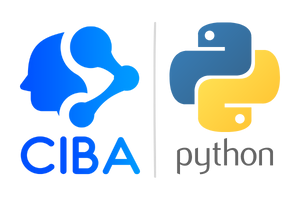


Contenido:
* Conocimientos Previos
* Introducción a BeautifulSoup
* Extracción de información de una página web
* Ventajas, Desventajas y Comparativa con otra librería

# Web Scraping

El web scraping es un método automatizado utilizado para extraer grandes cantidades de datos de páginas web. 

La información de las páginas web son datos no estructurados, por lo cual este método nos ayuda recopilar la información en datos estructurados (TXT, JSON, CSV, ...)

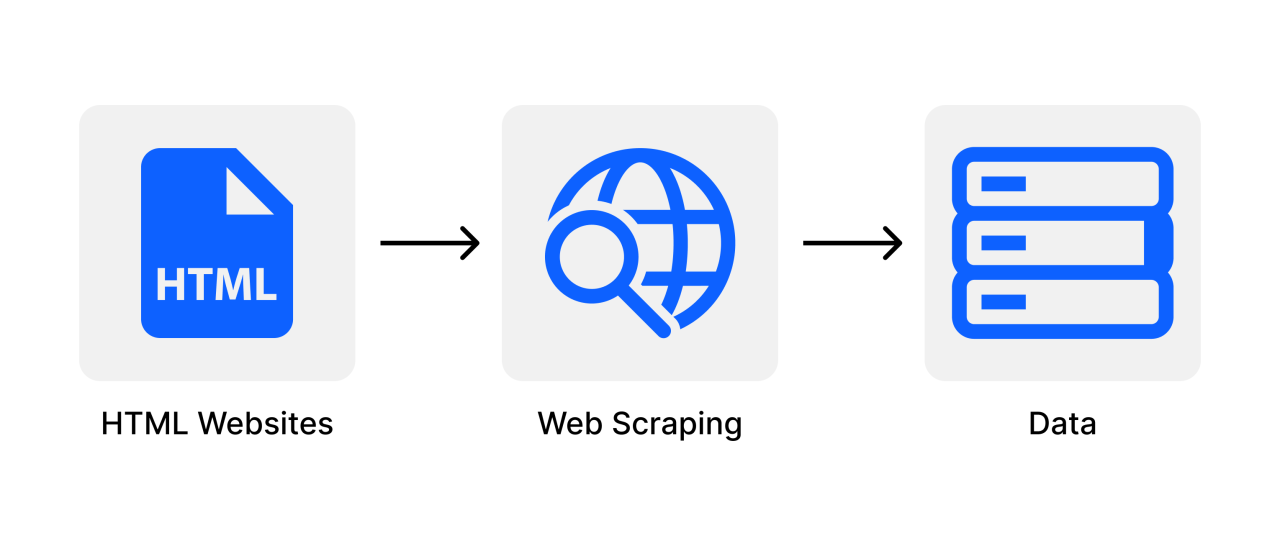

Existen principalmente dos formas de extraer datos de un sitio web:

* Utilice la API del sitio web (si existe). Ejemplo: Youtube Data API, Facebook APIs, Twitter APIs, etc.

* Acceder al HTML de la página web y extraer la información deseada.

## ¿Qué debo de conocer para realizar web scraping?

### 1. Estructura Web 

#### Estructura de una página HTML

Un documento html se compone de tres partes.

**Head**

Parte inicial del documento. Contiene el título, configuración inicial, estilos de CSS, etc.

**Body**

Estructura que contiene la información que se desea mostrar al usuario.

>  Etiquetas Contenedoras: Lleva más etiquetas dentro. Ayuda a generar la estrictura de la página web.

> Etiquetas de Contenido: Videos, texto, imágenes, etc.

**Footer**

Se encuentra en la parte final de la página Web.


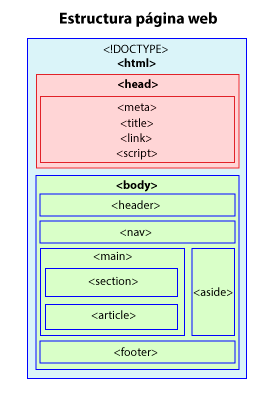

#### Estructura de una etiqueta HTML

* Etiqueta de Apertura
* Etiqueta de Cierre (No todas las etiquetas tienen una etiqueta de cierre)

* Contenido: Solo las etiquetas con cierre tienen contenido

* Atributo: Se encuentran dentro de la etiqueta (no todos los atributos necesitan un valor asignado)

* Elemento: Etiqueta + Contenido

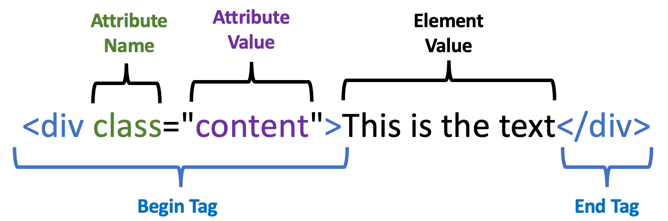

### Expresiones Regulares (Regex)

Son patrones de caracteres que se utilizan para encontrar coincidencias en un texto.

Ejemplo:
- El correo institucional de la UNALM: En el caso de los alumnos tiene la forma codigo@lamolina.edu.pe 
> Si queremos obtener el código, debemos de elegir todos los caracteres hasta el @.

- Los números de celular: +51 987 654 321. 
> Si queremos confirmar que es un número de este país debe de comenzar por +51. Un total de 9 dígitos y por supuesto no contener ninguna letra o símbolo adicional. 


Documentación de la librería `re`:

https://docs.python.org/es/3/library/re.

Cheatsheet regex:

https://res.cloudinary.com/dyd911kmh/image/upload/v1665049611/Marketing/Blog/Regular_Expressions_Cheat_Sheet.pdf

In [ ]:
import re

#### Match

Busca si existen caracteres al principio de la cadena de caracteres que coinciden con el patrón.

In [ ]:
re.match('casa','casa, Casa, casas')

<re.Match object; span=(0, 4), match='casa'>

#### Search

Busca la primera coincidencia del patrón en la cadena de caracteres.

In [ ]:
re.search('casa','casa, Casa, casas')

<re.Match object; span=(0, 4), match='casa'>

**Match vs Search**

In [ ]:
re.match("c", "abcdef")    # None

In [ ]:
re.search("c", "abcdef")   # Retorna el objeto re.Match

<re.Match object; span=(2, 3), match='c'>

#### Fullmatch

Busca si la cadena de caracteres coincide exactamente con el patrón establecido.

In [ ]:
#Patron para ver si un correo institucional (alumnos) está bien escrito
patron = re.compile('[0-9]{8}@lamolina.edu.pe')
#patron = re.compile('\d{8}@lamolina.edu.pe')

In [ ]:
correos = ['20180252@lamolina.edu.pe','ciba@lamolina.edu.pe','201802520@lamolina.edu.pe','20230252@lamolina.edu.pe']

#Coincide el primero y el último
for correo in correos:
  print(re.fullmatch(patron,correo))

<re.Match object; span=(0, 24), match='20180252@lamolina.edu.pe'>
None
None
<re.Match object; span=(0, 24), match='20230252@lamolina.edu.pe'>


#### Split

Divide una cadena de caracteres por el número de veces en las que se encuentra el patrón.

In [ ]:
#Split con re.split
re.split(', ','Primer Ciclo 1, Segundo Ciclo 2, Tercer Ciclo 3')

['Primer Ciclo 1', 'Segundo Ciclo 2', 'Tercer Ciclo 3']

In [ ]:
#Método str.split
'Primer Ciclo 1, Segundo Ciclo 2, Tercer Ciclo 3'.split(', ')

['Primer Ciclo 1', 'Segundo Ciclo 2', 'Tercer Ciclo 3']

In [ ]:
#(Palabra objetivo)(espacio)(número)(coma)(espacio)
' Primer Ciclo                  1      ,            ...'

' Primer Ciclo                  1      ,            ...'

In [ ]:
#Caso de uso con Regex
re.split('\s\d{1}[,\s]*','Primer Ciclo 1, Segundo Ciclo 2, Tercer Ciclo 3') #maxsplit

['Primer Ciclo', 'Segundo Ciclo', 'Tercer Ciclo', '']

#### Findall

Retorna todas las coincidencias del patrón en la cadena de caracteres.

In [ ]:
re.findall('o','Esto es una oración')

['o', 'o']

In [ ]:
#No identifica coincidencias superpuestas
re.findall('aba','aba, ababa')

['aba', 'aba']

In [ ]:
re.findall('([A-Za-z]+)','Usuario123@empresa.com')

['Usuario', 'empresa', 'com']

In [ ]:
re.findall('(\w+)=(\d+)', 'establecer width=20 y height=10')

[('width', '20'), ('height', '10')]

#### Sub

Reemplaza caracteres de una cadena que coinciden con el patrón dado.


In [ ]:
re.sub('ala','Ala','alallalala')

'AlallAlala'

In [ ]:
re.sub('\sand\s', ' & ', 'Discovery Home and Health')

'Discovery Home & Health'

#### Compile

Compila un patrón en un objeto tipo `re.Pattern`. Con este objeto se pueden realizar de forma similar las consultas vistas anteriormente. 

La diferencia radica en que este objeto contiene un parámetros de posición.

In [ ]:
patron = re.compile('patron')
type(patron)

re.Pattern

In [ ]:
pattern = re.compile("a")
print(pattern.match("palabra"))      # No match
pattern.match("palabra", 1)          # Match

None


<re.Match object; span=(1, 2), match='a'>

### Y conocimiento de programación

## Explorando una etiqueta con BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

<p class="clase-ejemplo">Esto es una frase</p>

In [ ]:
soup = bs('<p class="clase-ejemplo">Esto es una frase</p>')
soup

<html><body><p class="clase-ejemplo">Esto es una frase</p></body></html>

In [ ]:
#Recuperamos la etiqueta de párrafo
tag = soup.p
tag

<p class="clase-ejemplo">Esto es una frase</p>

In [ ]:
print(f"Nombre de la etiqueta: {tag.name}")
print(f"Valor del atributo 'class': {tag['class']}")

Nombre de la etiqueta: p
Valor del atributo 'class': ['clase-ejemplo']


In [ ]:
#Diccionario de atributos
tag.attrs

{'class': ['clase-ejemplo']}

In [ ]:
#Otra forma de obtener el valor del atributo
tag.get('class')

['clase-ejemplo']

In [ ]:
#Contenido de la etiqueta
tag.string

'Esto es una frase'

## Descarga del contenido de la página web

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
html = requests.get('https://omdena.com/blog/web-scraping-python-beautifulsoup/')

In [ ]:
#Verificando la conexión con la página web
html

<Response [200]>

In [ ]:
#Extraemos el contenido
soup = bs(html.content, "html.parser")

In [ ]:
soup.original_encoding

'utf-8'

In [ ]:
soup.head

In [ ]:
soup.body

### Introducción a `find` y `find_all`

In [ ]:
#Encuentra la primera etiqueta de párrafo 
soup.find('p')

<p id="breadcrumbs"><span><span><a data-wpel-link="internal" href="https://omdena.com/">Home</a></span> / <span><a data-wpel-link="internal" href="https://omdena.com/tutorials/">Real-World Tutorials</a></span> / <span aria-current="page" class="breadcrumb_last">How to Build a Web Scraping Pipeline in Python Using BeautifulSoup</span></span></p>

In [ ]:
#Encuentra la primera etiqueta h3
soup.find('h3')

<h3 id="step-1-identify-your-goal-and-explore-the-website-of-interest"><b>STEP 1: Identify Your Goal and Explore the Website of Interest</b></h3>

In [ ]:
#Recuperamos todas las etiquetas h3 de la página
soup.find_all('h3')

[<h3 id="step-1-identify-your-goal-and-explore-the-website-of-interest"><b>STEP 1: Identify Your Goal and Explore the Website of Interest</b></h3>,
 <h3 id="step-2-inspect-web-pages-HTML"><b>STEP 2: Inspect Web Page’s HTML</b></h3>,
 <h3 id="step-3-install-and-import-libraries"><b>STEP 3: Install and Import Libraries</b></h3>,
 <h3 id="step-4-retrieve-website-and-parse-HTML"><strong>STEP 4: Retrieve Website and Parse HTML</strong></h3>,
 <h3 id="#step-5-extract-clean-and-store-data"><strong>STEP 5: Extract, Clean, and Store Data</strong></h3>,
 <h3 id="step-6-save-file"><strong>STEP 6: Save File</strong></h3>,
 <h3>How Omdena works? <span style="color: #a1a1a1; font-weight: 300;">Join or host projects and build solutions through the power of collaboration. </span></h3>,
 <h3 class="entry-title"><a data-wpel-link="internal" href="https://omdena.com/blog/detecting-automatic-lake-encroachment-in-chennai/" target="_self">Detecting Automatic Lake Encroachment using Machine Learning and Remo

In [ ]:
#También se puede filtrar por los atributos internos de la etiqueta
soup.find_all('h3',{'class':'entry-title'})

[<h3 class="entry-title"><a data-wpel-link="internal" href="https://omdena.com/blog/detecting-automatic-lake-encroachment-in-chennai/" target="_self">Detecting Automatic Lake Encroachment using Machine Learning and Remote Sensing in Chennai</a></h3>,
 <h3 class="entry-title"><a data-wpel-link="internal" href="https://omdena.com/blog/ai-assisted-collaborative-mapping-tool-with-humanitarian-openstreetmap/" target="_self">Developing an AI Assisted Collaborative Mapping Tool with Humanitarian OpenStreetMap</a></h3>,
 <h3 class="entry-title"><a data-wpel-link="internal" href="https://omdena.com/blog/analyse-pipe-borne-water-availability-in-lagos-nigeria/" target="_self">Applying Machine Learning to Analyse Pipe-Borne Water Availability in Lagos, Nigeria</a></h3>]

In [ ]:
#Obtener por parte de un texto
import re
soup.find_all('h3',string=re.compile('STEP'))

[<h3 id="step-1-identify-your-goal-and-explore-the-website-of-interest"><b>STEP 1: Identify Your Goal and Explore the Website of Interest</b></h3>,
 <h3 id="step-2-inspect-web-pages-HTML"><b>STEP 2: Inspect Web Page’s HTML</b></h3>,
 <h3 id="step-3-install-and-import-libraries"><b>STEP 3: Install and Import Libraries</b></h3>,
 <h3 id="step-4-retrieve-website-and-parse-HTML"><strong>STEP 4: Retrieve Website and Parse HTML</strong></h3>,
 <h3 id="#step-5-extract-clean-and-store-data"><strong>STEP 5: Extract, Clean, and Store Data</strong></h3>,
 <h3 id="step-6-save-file"><strong>STEP 6: Save File</strong></h3>]

In [ ]:
#Otra forma
import re
title3 = soup.find_all('h3',{'id':re.compile('step-[0-9]')})

In [ ]:
#Obtenemos el texto dentro de la lista de resultados
[i.string for i in title3]

['STEP 1: Identify Your Goal and Explore the Website of Interest',
 'STEP 2: Inspect Web Page’s HTML',
 'STEP 3: Install and Import Libraries',
 'STEP 4: Retrieve Website and Parse HTML',
 'STEP 5: Extract, Clean, and Store Data',
 'STEP 6: Save File']

## Extracción de la información buscada

In [ ]:
codigo = soup.find_all('pre')

In [ ]:
codigo[2]

<pre>pip install beautifulsoup4
pip install requests
pip install pandas</pre>

In [ ]:
codigo[2].get_text()

'pip install beautifulsoup4\npip install requests\npip install pandas'

In [ ]:
for i in codigo:
  print(i.get_text())

In [ ]:
type(codigo[0])

bs4.element.Tag

### Limpieza de la extracción

Identificando los fragmentos de código que son HTML

In [ ]:
import re
cod = []
for i in codigo:
  texto = i.find_all(string=re.compile(r"^<\w|\n<\w"))
  if len(texto) == 0:
    cod.append(i)
  else:
    print(i)

<pre>...
&lt;ol class="row"&gt;
&lt;li class="col-xs-6 col-sm-4 col-md-3 col-lg-3"&gt;
&lt;article class="product_pod"&gt;
&lt;div class="image_container"&gt;...&lt;/div&gt; 
&lt;p class="star-rating Three"&gt;...&lt;/p&gt;
&lt;h3&gt;
&lt;a href="../../../the-secret-garden_413/index.html" title="The Secret Garden"&gt;The Secret Garden&lt;/a&gt;
&lt;/h3&gt;
&lt;div class="product_price"&gt;...&lt;/div&gt;
&lt;article&gt;
&lt;li&gt;
&lt;li class="col-xs-6 col-sm-4 col-md-3 col-lg-3"&gt;...&lt;li&gt;
&lt;li class="col-xs-6 col-sm-4 col-md-3 col-lg-3"&gt;...&lt;li&gt;
...</pre>
<pre>...
&lt;div class="product_price"&gt; 
&lt;p class="price_color"&gt;£15.08&lt;/p&gt;
&lt;p class="instock availability"&gt;
&lt;i class="icon-ok"&gt;&lt;/i&gt;
In stock
&lt;/p&gt;
...</pre>
<pre>&lt;a href="../../../and-then-there-were-none_119/index.html" title="And Then There Were None"&gt;And Then There Were ...&lt;/a&gt;</pre>
<pre>&lt;span class="a-icon-alt"&gt;4.8 out of 5 stars&lt;/span&gt;&lt;/i&gt;</pr

In [ ]:
len(cod),len(codigo)

(16, 25)

In [ ]:
cod[9]

<pre><span style="font-weight: 400;">def</span> <span style="font-weight: 400;">fetch_all_books</span><span style="font-weight: 400;">(soup):</span>
<span style="font-weight: 400;">    </span><span style="font-weight: 400;"># Fetch all the books information</span>
<span style="font-weight: 400;">    </span><span style="font-weight: 400;"># Return books_all, a list of dictionary that contains all the extracted data</span>
<span style="font-weight: 400;">    </span>
<span style="font-weight: 400;">    </span><span style="font-weight: 400;"># Find all the categories by running find_categories() function</span>
<span style="font-weight: 400;">    categories = find_categories(soup)</span>
<span style="font-weight: 400;">    </span><span style="font-weight: 400;"># Loop through categories</span>
<span style="font-weight: 400;">    </span><span style="font-weight: 400;">for</span><span style="font-weight: 400;"> category </span><span style="font-weight: 400;">in</span><span style="font-weight

In [ ]:
#Identificando los codigos que contienen la etiqueta span
for i in codigo:
  texto = i.find_all(string=re.compile(r"^<\w|\n<\w"))
  span = i.find_all('span',string=re.compile(r"\w"))

  #Si pasó el primer filtro
  if len(texto) == 0:
    print(len(span)) #Segundo Filtro

0
0
0
0
0
0
0
0
0
20
0
8
0
0
0
0


In [ ]:
[s.get_text() for s in cod[9].find_all('span')]

['def',
 'fetch_all_books',
 '(soup):',
 '\xa0 \xa0 ',
 '# Fetch all the books information',
 '\xa0 \xa0 ',
 '# Return books_all, a list of dictionary that contains all the extracted data',
 '\xa0 \xa0 ',
 '\xa0 \xa0 ',
 '# Find all the categories by running find_categories() function',
 '\xa0 \xa0 categories = find_categories(soup)',
 '\xa0 \xa0 ',
 '# Loop through categories',
 '\xa0 \xa0 ',
 'for',
 ' category ',
 'in',
 ' categories:',
 '\xa0 \xa0 \xa0 \xa0 ',
 '# Fetch product by category',
 '\xa0 \xa0 \xa0 \xa0 ',
 '# Within the fetch_books_by_category function, we will scrape products page by page',
 '\xa0 \xa0 \xa0 \xa0 ',
 '\xa0 \xa0 \xa0 \xa0 category_name = category.find(',
 "'a'",
 ').text.strip()',
 '\xa0 \xa0 \xa0 \xa0 fetch_books_by_category(category_name, category)',
 '\xa0 \xa0 \xa0 \xa0 ',
 '\xa0 \xa0 ',
 'return',
 ' books_all\xa0 \xa0 ']

In [ ]:
[s.get_text().replace('\xa0 \xa0 ','') for s in cod[9].find_all('span')]

['def',
 'fetch_all_books',
 '(soup):',
 '',
 '# Fetch all the books information',
 '',
 '# Return books_all, a list of dictionary that contains all the extracted data',
 '',
 '',
 '# Find all the categories by running find_categories() function',
 'categories = find_categories(soup)',
 '',
 '# Loop through categories',
 '',
 'for',
 ' category ',
 'in',
 ' categories:',
 '',
 '# Fetch product by category',
 '',
 '# Within the fetch_books_by_category function, we will scrape products page by page',
 '',
 'category_name = category.find(',
 "'a'",
 ').text.strip()',
 'fetch_books_by_category(category_name, category)',
 '',
 '',
 'return',
 ' books_all']

In [ ]:
ejemplo = ' '.join([s.get_text().replace('\xa0 \xa0 ','\n') for s in cod[9].find_all('span')])
ejemplo

"def fetch_all_books (soup): \n # Fetch all the books information \n # Return books_all, a list of dictionary that contains all the extracted data \n \n # Find all the categories by running find_categories() function \ncategories = find_categories(soup) \n # Loop through categories \n for  category  in  categories: \n\n # Fetch product by category \n\n # Within the fetch_books_by_category function, we will scrape products page by page \n\n \n\ncategory_name = category.find( 'a' ).text.strip() \n\nfetch_books_by_category(category_name, category) \n\n \n return  books_all\n"

In [ ]:
bs(ejemplo).p

<p>def fetch_all_books (soup): 
 # Fetch all the books information 
 # Return books_all, a list of dictionary that contains all the extracted data 
 
 # Find all the categories by running find_categories() function 
categories = find_categories(soup) 
 # Loop through categories 
 for  category  in  categories: 

 # Fetch product by category 

 # Within the fetch_books_by_category function, we will scrape products page by page 

 

category_name = category.find( 'a' ).text.strip() 

fetch_books_by_category(category_name, category) 

 
 return  books_all
</p>

In [ ]:
cod = []
for i in codigo:
  texto = i.find_all(string=re.compile(r"^<\w|\n<\w"))
  span = i.find_all('span',string=re.compile(r"\xa0"))
  if len(texto) == 0:
    res = i
    
    if len(span) > 0:
      res = bs(' '.join([s.get_text() for s in i.find_all('span')]).replace('\xa0 \xa0 ','\n')).p
    
    cod.append(res.get_text())

In [ ]:
len(cod),len(codigo)

(16, 25)

In [ ]:
cod

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_drive="/content/drive/My Drive/UNIVERSIDAD/CIBA/{}".format('ws.py')
dir_drive

'/content/drive/My Drive/UNIVERSIDAD/CIBA/ws.py'

In [ ]:
import numpy as np
np.savetxt(dir_drive,cod,delimiter=",",fmt="%s",encoding='utf-8')

In [ ]:
%cd "/content/drive/My Drive/UNIVERSIDAD/CIBA"

/content/drive/My Drive/UNIVERSIDAD/CIBA


In [ ]:
!ls

'Archivos Exportados'			      'PYTHON BÁSICO'
'CONVOCATORIA 2022'			      'PYTHON INTERMEDIO'
'Convocatoria CIBA 2022 - Respuestas.gsheet'   REUNIONES
'Horario Entrevista CIBA 2022.gform'	       ws.py
'Proyecto Ajies'


In [ ]:
#Lamentablemento no funciona
%load 'ws.py'

## Selenium vs Beautiful Soup

Selenium es una herramienta de automatización del navegador web que puede interactuar con páginas web como un usuario humano. En cambio, BeautifulSoup es una librería para analizar documentos HTML y XML.

Por lo tanto, al momento de analizar páginas web dinámicas, Selenium es una herramienta de ayuda. Sin embargo, para páginas estáticas BeautifulSoup es óptimo debido a que consume menos recursos que Selenium.